# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [103]:
new_df = df.loc[df['dt'] > '1950-01-01']
new_df = new_df.dropna()
new_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
1217,1950-06-01,25.454,0.209,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

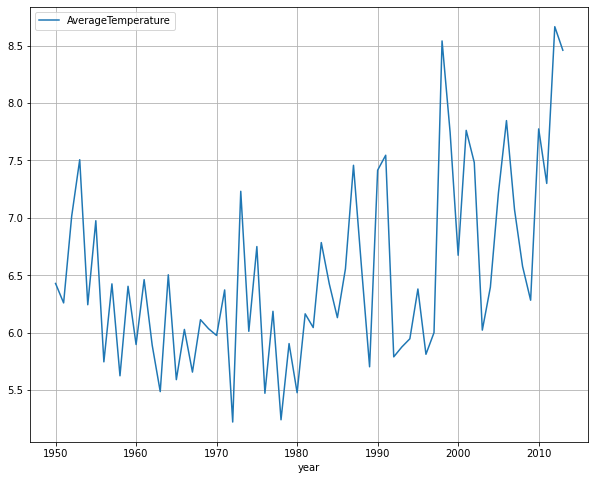

In [104]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]
pd.options.mode.chained_assignment = None
new_df['year'] = new_df['dt'].apply(lambda x: x.year)
new_df[new_df['City'] == 'Toronto'].groupby('year').mean()['AverageTemperature'].plot(grid='True')
plt.legend()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [105]:
q = new_df.groupby('City')['AverageTemperature'].var()
q[q == q.max()]

City
Harbin    218.493792
Name: AverageTemperature, dtype: float64

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [151]:
new_df['Latitude_n'] = new_df['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -1 * float(x[:-1]))
new_df['month'] = new_df['dt'].apply(lambda x: x.month)

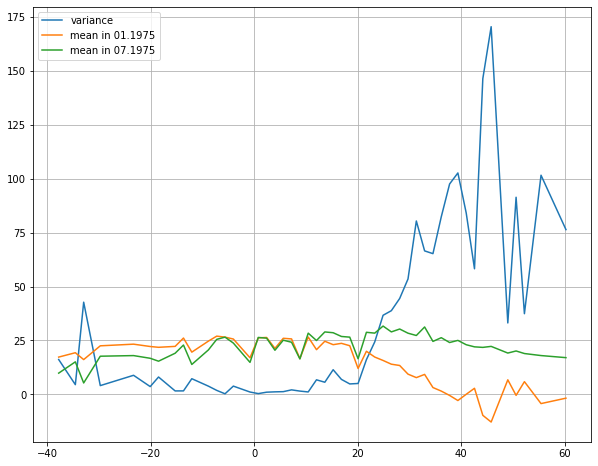

In [152]:
plt.grid()
plt.plot(new_df.groupby('Latitude_n')['AverageTemperature'].var(), label='variance')
plt.plot(new_df[(new_df['year']==1975) & (new_df['month']==1)].groupby('Latitude_n')['AverageTemperature'].mean(), label='mean in 01.1975')
plt.plot(new_df[(new_df['year']==1975) & (new_df['month']==7)].groupby('Latitude_n')['AverageTemperature'].mean(), label='mean in 07.1975')
plt.legend()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [153]:
SaintPet_df = new_df[new_df['City'] == 'Saint Petersburg'].groupby('year').mean()['AverageTemperature']
max_temp = SaintPet_df[(SaintPet_df > SaintPet_df.shift(1)) & (SaintPet_df > SaintPet_df.shift(-1))]

Линейная регрессия из sklearn

In [154]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
X =np.array(SaintPet_df.index).reshape(-1,1)
lr.fit(X, SaintPet_df.values)

LinearRegression()

In [155]:
prediction = lr.predict(X)

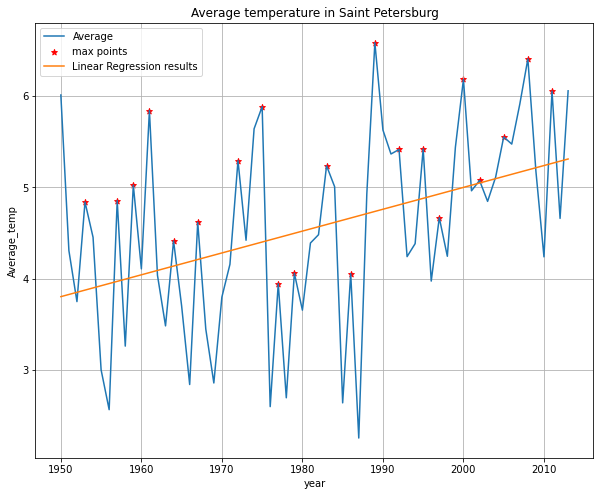

In [156]:
plt.grid()
plt.plot(SaintPet_df,label = 'Average')
plt.ylabel('Average_temp')
plt.xlabel('year')
plt.title('Average temperature in Saint Petersburg')
plt.scatter(max_temp.index, max_temp, marker='*', c='r', label='max points')
plt.plot(SaintPet_df.index, prediction, label='Linear Regression results')
plt.legend()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [157]:
q = (new_df.groupby(['City','year']).mean().groupby('City')['AverageTemperature'].max() 
     - new_df.groupby(['City','year']).mean().groupby('City')['AverageTemperature'].min()).idxmax()
q

'Mashhad'

In [158]:
q = new_df.groupby(['City', 'month'], as_index=False)['AverageTemperature'].mean()
q[q['month'] == 1].reset_index().iloc[(q[q['month'] == 1].reset_index()['AverageTemperature'] - q[q['month'] == 7].reset_index()['AverageTemperature']).idxmax()]['City']


'Santiago'

In [159]:
q = new_df.groupby(['City', 'year', 'month'], as_index=False)['AverageTemperature'].mean()
q[q['AverageTemperature'] < 0].groupby('City')['month'].count().idxmax()

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

1. Создаем колоники со значениями долготы и широты

In [160]:
import geopandas
import folium
import geodatasets
new_df['Latitude_n'] = new_df['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -1 * float(x[:-1]))
new_df['Longitude_n'] = new_df['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -1 * float(x[:-1]))

Создаем GeoDataFrame

In [161]:
geo_df = new_df[(new_df['year'] >= 2003) & (new_df['month'] == 1)].groupby('City',as_index=False).mean()
geometry = geopandas.points_from_xy(geo_df.Longitude_n, geo_df.Latitude_n)
geo_df = geopandas.GeoDataFrame(geo_df[["City", "Latitude_n", "Longitude_n", "AverageTemperature"]], geometry=geometry)
geo_df.head()

,City,Latitude_n,Longitude_n,AverageTemperature,geometry
0,Abidjan,5.63,-3.23,27.310909,POINT (-3.23000 5.63000)
1,Addis Abeba,8.84,38.11,18.221818,POINT (38.11000 8.84000)
2,Ahmadabad,23.31,72.52,20.053000,POINT (72.52000 23.31000)
3,Aleppo,36.17,37.79,6.077727,POINT (37.79000 36.17000)
4,Alexandria,31.35,30.16,14.936636,POINT (30.16000 31.35000)


Карта с использованием только geopandas

Text(0.5, 1.0, 'Average Temp of the Cities')

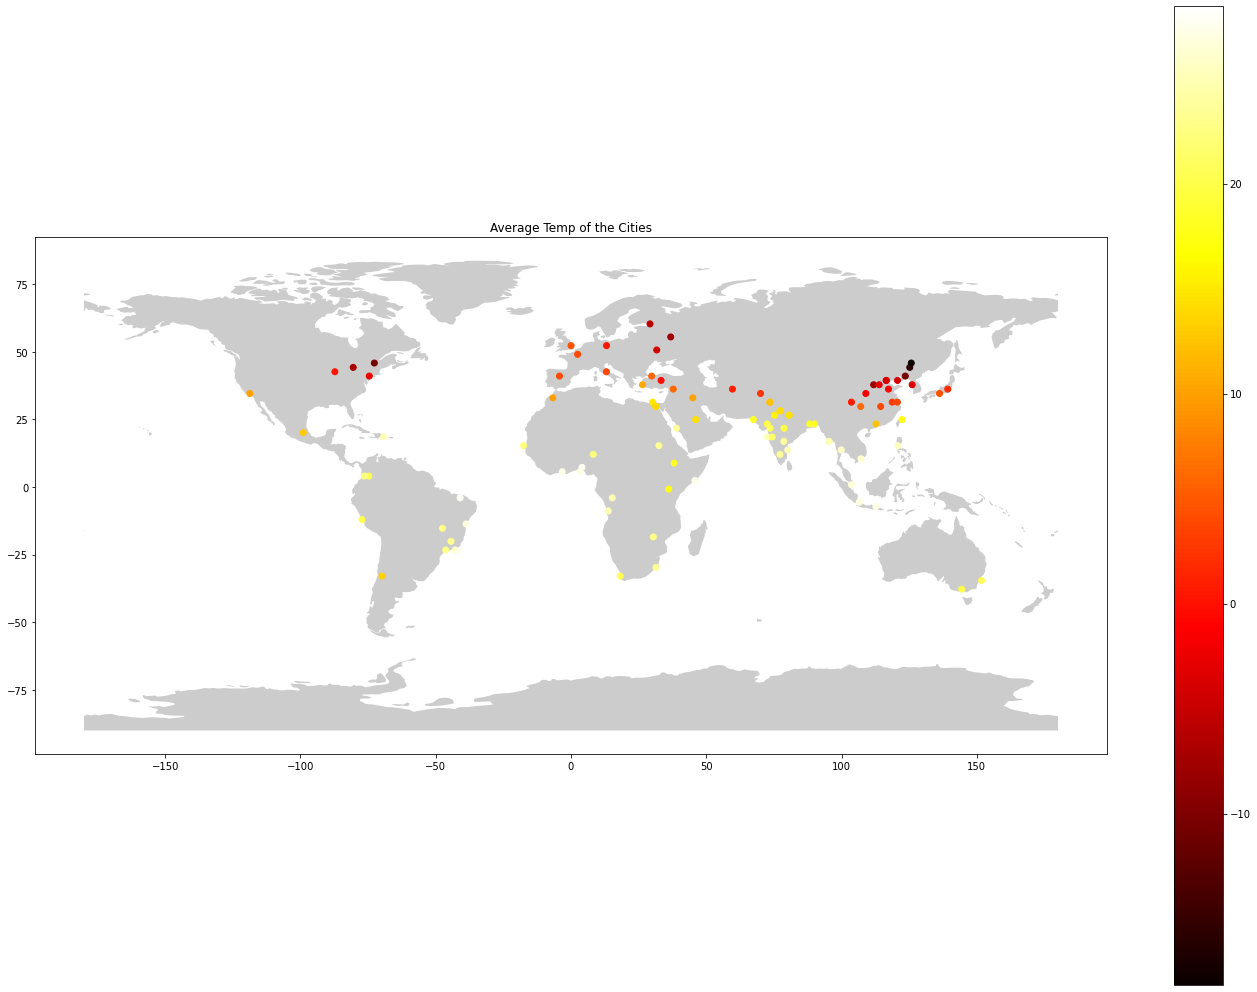

In [162]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="AverageTemperature",ax=ax, cmap=plt.colormaps['hot'], legend=True)
plt.title("Average Temp of the Cities")

Карта с использованием folium, города и значения подписаны на маркерах

In [118]:
import branca
map = folium.Map(location=[13.406, 80.110], tiles="CartoDB Positron", zoom_start=2)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

i = 0
colormap = branca.colormap.LinearColormap(colors=['red','yellow'],vmin=geo_df.AverageTemperature.min(),
                                          vmax=geo_df.AverageTemperature.max())
for coordinates in geo_df_list:

    map.add_child(
        folium.Marker(
            location=coordinates,
            popup= "Name: "
            + str(geo_df.City[i])
            + "<br>"
            + "AverageTemperature: "
            + str(geo_df.AverageTemperature[i])
            + "<br>"
            + "Coordinates: "
            + str(geo_df_list[i]),
        )
    )
    map.add_child(
        folium.Circle(
        location=coordinates,
        radius=100000,
        fill=True,
        color=colormap(geo_df.AverageTemperature[i]),
        )
    )
    i = i + 1

In [119]:
map.add_child(colormap)
display(map)

2. Тренд для каждого города по году

In [120]:
arr = []
q = new_df.groupby(['City','year'], as_index=False).mean()
X = np.arange(1950, 2014).reshape(-1, 1)
for city in q.City.unique():
    lr = LinearRegression()
    y = q[q['City'] == city]['AverageTemperature']
    lr.fit(X, y)
    arr.append(lr.coef_[0])
geo_df['angle'] = arr

In [121]:
geo_df['angle'] = arr

Text(0.5, 1.0, 'angle of temperature tendency')

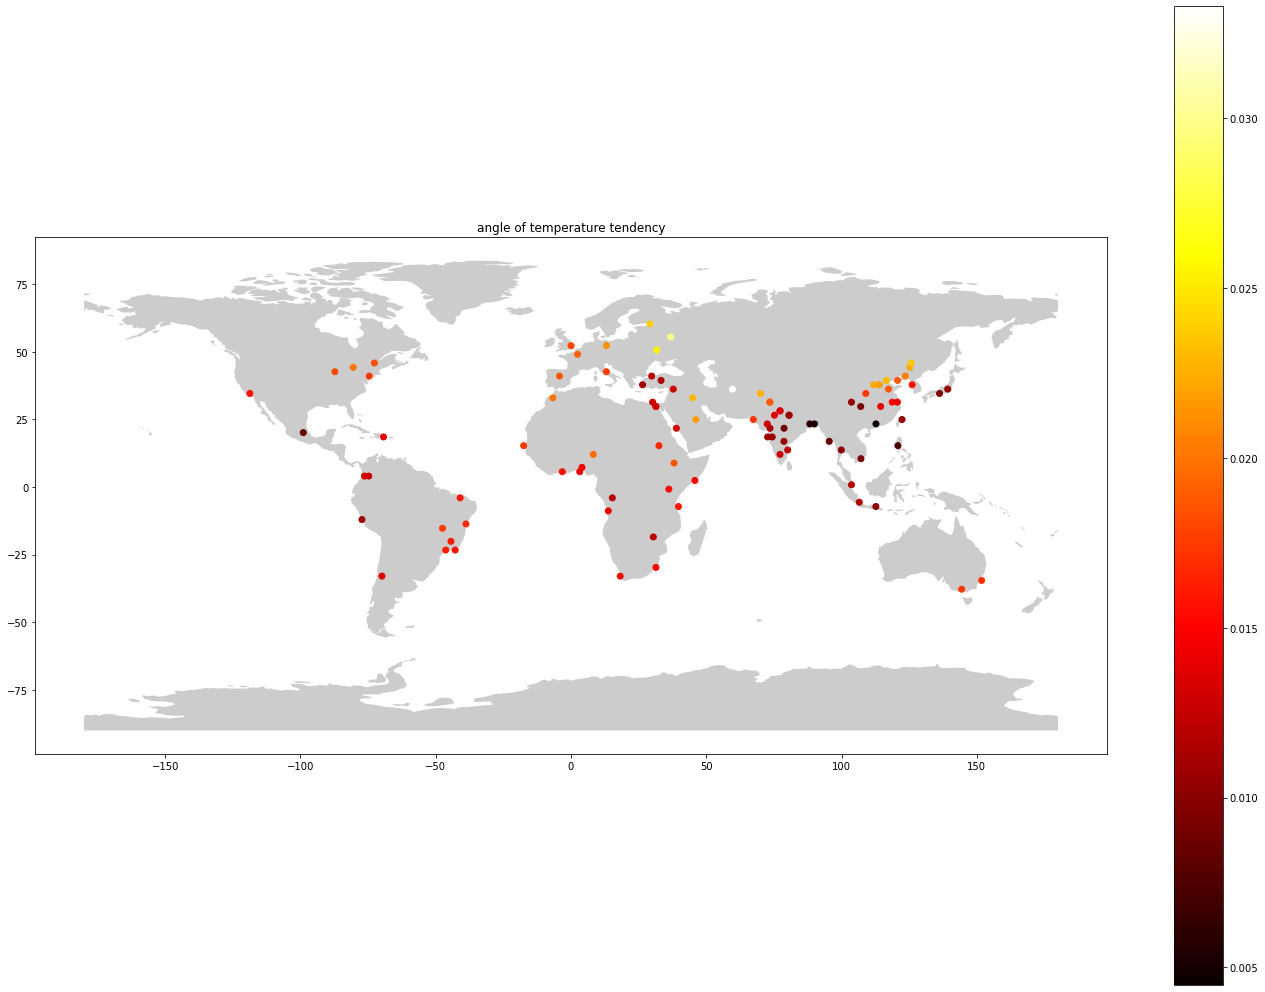

In [122]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="angle",ax=ax, cmap=plt.colormaps["hot"], legend=True)
plt.title("angle of temperature tendency")

In [123]:
import branca
map = folium.Map(location=[13.406, 80.110], tiles="CartoDB Positron", zoom_start=2)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

i = 0
colormap = branca.colormap.LinearColormap(colors=['red','yellow'],vmin=geo_df.angle.min(),
                                          vmax=geo_df.angle.max())
for coordinates in geo_df_list:

    map.add_child(
        folium.Marker(
            location=coordinates,
            popup= "Name: "
            + str(geo_df.City[i])
            + "<br>"
            + "AverageTemperature: "
            + f'{geo_df.AverageTemperature[i]:.2f}'
            + "<br>"
            + "angle: "
            + f'{geo_df.angle[i]:.3f}'
            + "<br>"
            + "Coordinates: "
            + str(geo_df_list[i]),
        )
    )
    map.add_child(
        folium.Circle(
        location=coordinates,
        radius=100000,
        fill=True,
        color=colormap(geo_df.angle[i]),
        )
    )
    i = i + 1

In [124]:
map.add_child(colormap)
display(map)